In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#df_1T = query_table(table='entsorgung_30T')
ent_week = weekday_time_series(sensor_id='entsorgung_1T')

ent_week['kw'] = round(ent_week['kw'], 2)
ent_week['kw'] = ent_week['kw'].apply(lambda x: 0.0 if x == -0.0 else x)
ent_week['log_kw'] = np.log(ent_week['kw'])

In [8]:
df = ent_week[ent_week.index > '2021-10-13 00:00:00']
df

,v,i,s,p,q,pf,phi,kw,log_kw
t,,,,,,,,,
2021-10-13 00:01:00,238.246967,5.145153,1225.557086,815.558306,-741.559549,0.651123,136.256565,0.82,-0.198451
2021-10-13 00:02:00,238.370982,5.141598,1225.341217,814.787620,-741.899166,0.650858,135.856779,0.81,-0.210721
2021-10-13 00:03:00,238.346528,5.230850,1246.466171,855.508373,-717.261052,0.668252,135.047261,0.86,-0.150823
2021-10-13 00:04:00,237.993657,5.233414,1245.239015,870.231558,-693.469623,0.680868,133.129603,0.87,-0.139262
2021-10-13 00:05:00,238.038777,5.434633,1293.283257,923.035762,-693.515379,0.686603,135.680536,0.92,-0.083382
...,...,...,...,...,...,...,...,...,...
2021-10-15 23:55:00,239.472000,5.978979,1431.004115,1066.574473,-766.449978,0.705540,134.989437,1.07,0.067659
2021-10-15 23:56:00,239.181536,6.096141,1457.356172,1096.738966,-764.211189,0.708808,135.432855,1.10,0.095310
2021-10-15 23:57:00,238.882853,5.983416,1428.601809,1065.777656,-765.090698,0.708304,134.283978,1.07,0.067659


Text(0.5, 1.0, '1 Minute Frequency')

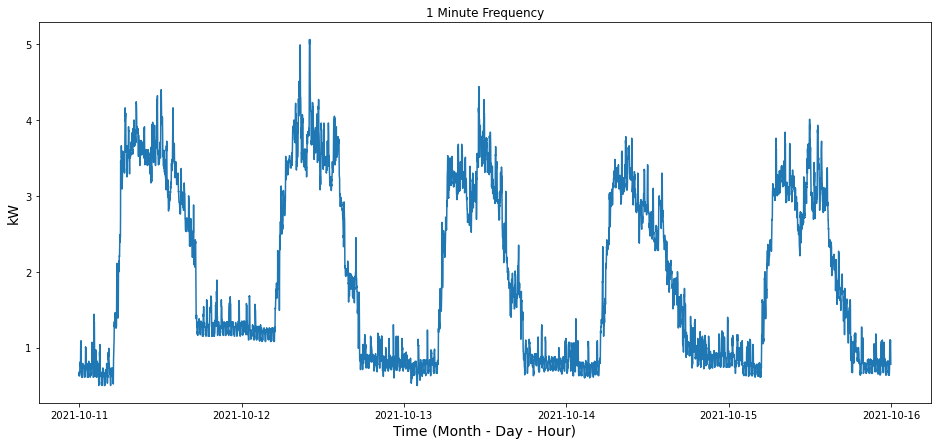

In [10]:
plt.figure(figsize=(16, 7))
plt.plot(ent_week.index, ent_week.kw)
plt.xlabel('Time (Month - Day - Hour)', size=14)
plt.ylabel('kW', size=14)
plt.title('1 Minute Frequency')

In [14]:
px.line(
    x=ent_week.index, y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [15]:
ent_week.shape

(1440, 9)

In [16]:
time_int_range = np.arange(0, 1440*5, 5)
ent_week['t'] = time_int_range
ent_week['t_scaled'] = (ent_week['t'] - ent_week['t'].min()) / (ent_week['t'].max() - ent_week['t'].min())

In [17]:
px.line(
    x=ent_week['t_scaled'], y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

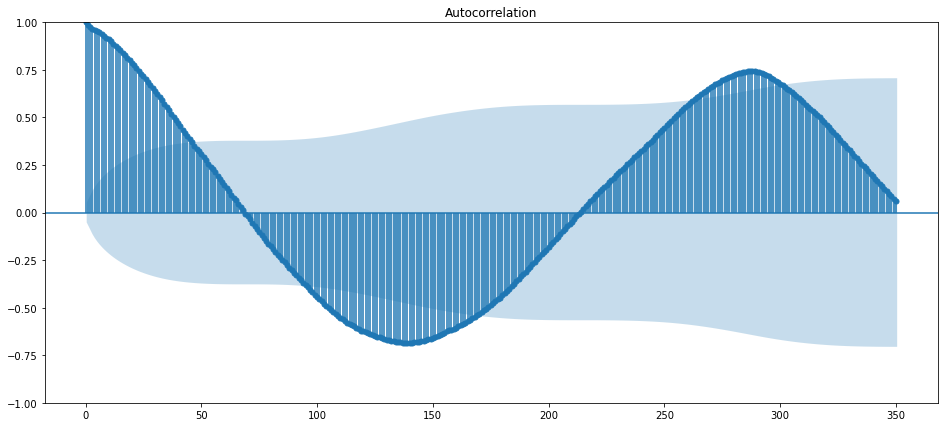

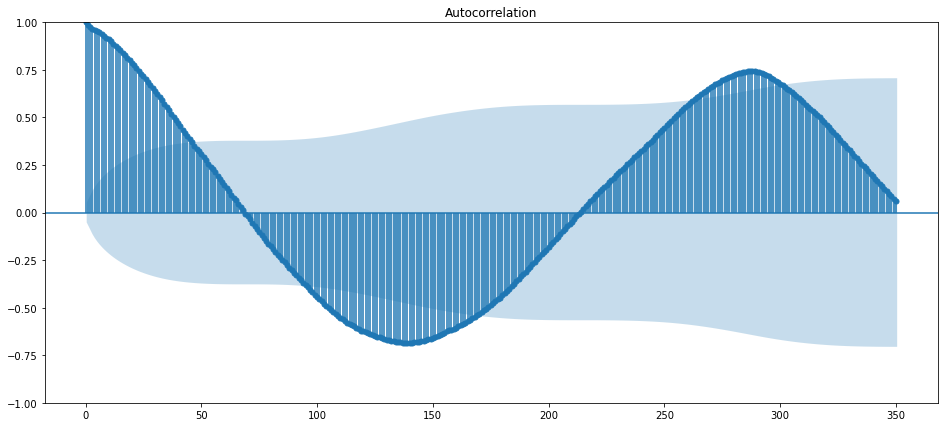

In [23]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(ent_week.kw.values.squeeze(), lags=350, ax=ax)

In [22]:
# Short term interval
ent_week['t_scaled'].iloc[125], ent_week['t_scaled'].iloc[150]

(0.08686587908269632, 0.10423905489923559)

In [24]:
# Long term interval
ent_week['t_scaled'].iloc[260], ent_week['t_scaled'].iloc[300]

(0.18068102849200834, 0.20847810979847117)